# Overview
* Project Data
* Project Data Analysis
* Training Data Analysis

## Project Data

In [48]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from autocat.data.datasets import get_training_data

### UPC and Product Descriptions

In [4]:
product_df = pd.read_csv('../data/raw/upc-product-descriptions.csv',sep='\t')
product_df.head()

,UPCCode,Description
0,5645460,BWC MOIST PLUS SHAMP
1,5645460,BWC SHAMP MOISTURE PLUS
2,5645460,MOISTURE PLUS SHAMPOO
3,5645460,"SHAMP,MOISTURE PLUS"
4,5645461,BWC COND MOISTURE PLUS


In [5]:
product_df = product_df.astype('str')

### SQL Data

In [6]:
project_df = pd.read_csv('../data/raw/project-data-2018-02-27.csv', sep='\t')
project_df.head()

,UniversalProductCode,AvgUnitsShipped,StdUnitsShipped,MinUnitsShipped,MaxUnitsShipped,AvgNetAmount,StdNetAmount,MinNetAmount,MaxNetAmount,NumberOfTransactions,NumberOfTransactionDays,GLCategory
0,69765869205,1.000000,0.000000,1.0,1.0,37.183750,2.495539,34.92,40.50,8,8,Inventory - Packaged Grocery
1,2250613410,1.145454,0.573699,1.0,6.0,35.645381,8.054258,0.00,76.20,275,174,Inventory - Packaged Grocery
2,85688520009,4.336294,4.418702,0.0,36.0,8.962798,9.049392,0.00,79.56,1576,264,Inventory - Body Care
3,89477300104,1.343834,0.910368,0.0,20.0,19.427881,13.187472,0.00,231.40,3682,290,Inventory - Packaged Grocery
4,25317775304,1.579902,1.617614,-3.0,26.0,72.828589,68.665828,-123.66,1071.72,1531,237,Inventory - Meat


#### Summary

In [7]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7071 entries, 0 to 7070
Data columns (total 12 columns):
UniversalProductCode       7071 non-null int64
AvgUnitsShipped            7071 non-null float64
StdUnitsShipped            7008 non-null float64
MinUnitsShipped            7071 non-null float64
MaxUnitsShipped            7071 non-null float64
AvgNetAmount               7071 non-null float64
StdNetAmount               7008 non-null float64
MinNetAmount               7071 non-null float64
MaxNetAmount               7071 non-null float64
NumberOfTransactions       7071 non-null int64
NumberOfTransactionDays    7071 non-null int64
GLCategory                 7071 non-null object
dtypes: float64(8), int64(3), object(1)
memory usage: 663.0+ KB


7K SKUs, some missing values

In [8]:
project_df.isnull().sum()

UniversalProductCode        0
AvgUnitsShipped             0
StdUnitsShipped            63
MinUnitsShipped             0
MaxUnitsShipped             0
AvgNetAmount                0
StdNetAmount               63
MinNetAmount                0
MaxNetAmount                0
NumberOfTransactions        0
NumberOfTransactionDays     0
GLCategory                  0
dtype: int64

Null standard deviations means there was only one record over which the aggregate values were calculated

#### Categories

In [9]:
project_df.GLCategory.unique()

array(['Inventory - Packaged Grocery', 'Inventory - Body Care',
       'Inventory - Meat', 'Inventory - Refrigerated Grocery',
       'Inventory - Frozen', 'Inventory - Vitamins',
       'Inventory - Packaged Tea'], dtype=object)

Drop the 'Inventory - ' from categories to make it easier to read

In [10]:
project_df['GLCategory'] = project_df.GLCategory.str.replace(r'Inventory - *', '')
project_df.GLCategory.unique()

array(['Packaged Grocery', 'Body Care', 'Meat', 'Refrigerated Grocery',
       'Frozen', 'Vitamins', 'Packaged Tea'], dtype=object)

Update the UPC type

In [11]:
project_df['UniversalProductCode'] = project_df['UniversalProductCode'].astype(str)

Category distributions

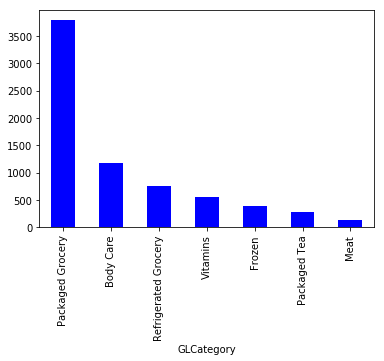

In [12]:
project_df.groupby('GLCategory').size().sort_values(ascending=False).plot(kind='bar', color='blue');

In [13]:
project_df.groupby('GLCategory').size().sort_values(ascending=False)

GLCategory
Packaged Grocery        3783
Body Care               1178
Refrigerated Grocery     754
Vitamins                 563
Frozen                   387
Packaged Tea             279
Meat                     127
dtype: int64

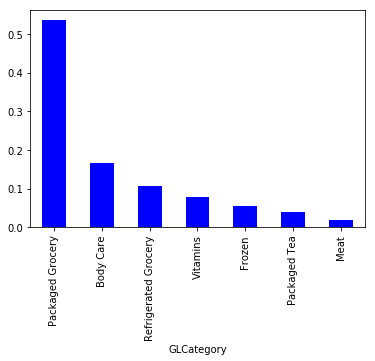

In [17]:
(project_df.groupby('GLCategory').size() / len(project_df)).sort_values(ascending=False).plot(kind='bar', color='blue');

Category proportions

In [18]:
(project_df.groupby('GLCategory').size() / len(project_df)).sort_values(ascending=False)

GLCategory
Packaged Grocery        0.535002
Body Care               0.166596
Refrigerated Grocery    0.106633
Vitamins                0.079621
Frozen                  0.054731
Packaged Tea            0.039457
Meat                    0.017961
dtype: float64

Obvious class imbalance present

## Project Data Analysis

### Distributions

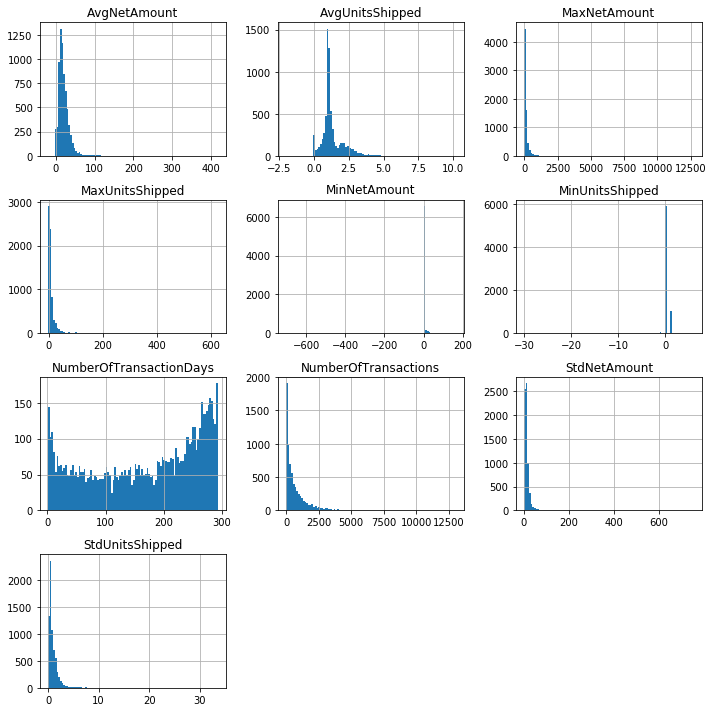

In [19]:
project_df.hist(figsize=(10,10), bins=100);
plt.tight_layout();

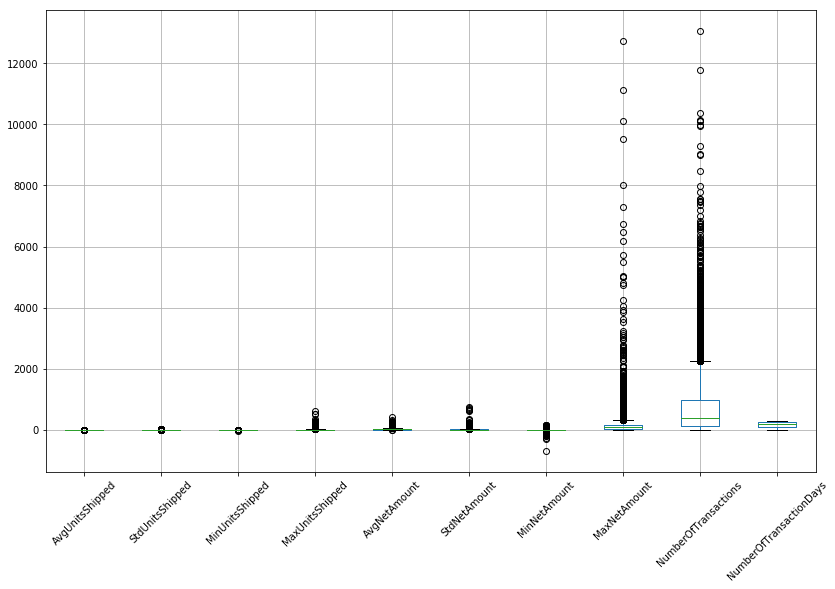

In [20]:
project_df.boxplot(figsize=(12,7));
plt.tight_layout();
plt.xticks(rotation=45);

Clearly some large outliers, in every dimension except for the number of days a product appeared. Outliers

### Statistics

In [21]:
project_df.describe()

,AvgUnitsShipped,StdUnitsShipped,MinUnitsShipped,MaxUnitsShipped,AvgNetAmount,StdNetAmount,MinNetAmount,MaxNetAmount,NumberOfTransactions,NumberOfTransactionDays
count,7071.000000,7008.000000,7071.000000,7071.000000,7071.000000,7008.000000,7071.000000,7071.000000,7071.000000,7071.000000
mean,1.317157,0.968692,0.116718,10.472635,20.959792,14.226758,0.539365,166.716736,751.402772,168.257814
std,0.857536,1.140811,0.715169,21.479026,19.262482,26.831354,15.581052,444.605398,1049.254809,93.404582
min,-2.000000,0.000000,-30.000000,-2.000000,-20.495000,0.000000,-702.000000,-18.000000,1.000000,1.000000
25%,0.952380,0.399606,0.000000,3.000000,11.016369,6.086789,0.000000,40.080000,117.000000,84.000000
50%,1.073891,0.627408,0.000000,6.000000,16.929151,9.458407,0.000000,77.940000,383.000000,188.000000
75%,1.435147,1.229189,0.000000,11.000000,26.226817,15.306873,0.000000,154.625000,967.500000,255.000000
max,10.181818,33.586118,6.000000,625.000000,418.480000,754.318156,163.620000,12733.750000,13045.000000,293.000000


* It seems odd that there would be products with **negative AvgUnitsShipped values**... Unless these were one-time returns.  This warrants a deeper analysis since it the negative values are likely to skew classifications, unless certain GL categories are associated with a larger number of returns.  There does not appear to be a lot of variation around UnitsShipped statistics except for MaxUnitsShipped.  Some products had instances of higher volume purchases compared to the norm.

* It appears that products are rather expensive with a AvgNetAmount value of \$21 and AvgUnitsShipped of 1.3 with the middle of the distribution laying between \$11 and \$26.  This means that, on average, NCG is paying $16/item (21 / 1.3).  **Were the enormously large values an anomaly or the due to increased volume for specific purchases?**

* The average product appeared on an invoice 751 times with a variance of +/- 1049 instances.  One product was included on an invoice as many as 13,000 times.

* On average, a product was purchased 168 days of the year which is roughly twice per year.  Most products were purchased between 84 and 255 times throughout 2017.

In [29]:
(project_df <= 0).sum(axis=0).sort_index()

AvgNetAmount                213
AvgUnitsShipped             209
GLCategory                 7071
MaxNetAmount                210
MaxUnitsShipped             208
MinNetAmount               6421
MinUnitsShipped            6000
NumberOfTransactionDays       0
NumberOfTransactions          0
StdNetAmount                174
StdUnitsShipped             291
UniversalProductCode       7071
dtype: int64

It's weird that there are lines with zero units and zero dollars.

In [32]:
categories.query('AvgUnitsShipped == 0').head(10)

,AvgUnitsShipped,StdUnitsShipped,MinUnitsShipped,MaxUnitsShipped,AvgNetAmount,StdNetAmount,MinNetAmount,MaxNetAmount,NumberOfTransactions,NumberOfTransactionDays,GLCategory
5096,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,1,1,Packaged Grocery
1054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,4,Packaged Grocery
1580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,Packaged Grocery
2463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,Packaged Grocery
2806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7,Packaged Grocery
1128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,Body Care
5174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59,43,Packaged Grocery
2319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,Frozen
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,6,Packaged Grocery
4724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,6,Packaged Grocery


Most zero-valued unit records are associated with other zero-valued metrics.  What does this look like accross GL categories?

In [30]:
project_df[(project_df.AvgUnitsShipped <= 0) | (project_df.AvgNetAmount <= 0)].groupby('GLCategory').size().sort_values(ascending=False)

GLCategory
Packaged Grocery        117
Vitamins                 26
Refrigerated Grocery     23
Body Care                22
Packaged Tea             13
Frozen                   12
dtype: int64

In [31]:
zero_totals = project_df[(project_df.AvgUnitsShipped <= 0) | (project_df.AvgNetAmount <= 0)].groupby('GLCategory').size().sort_index()
totals = project_df.groupby('GLCategory').size().sort_index()
(zero_totals / totals).sort_values(ascending=False)

GLCategory
Packaged Tea            0.046595
Vitamins                0.046181
Frozen                  0.031008
Packaged Grocery        0.030928
Refrigerated Grocery    0.030504
Body Care               0.018676
Meat                         NaN
dtype: float64

**It's not clear at this point how products with average net amount or units shipped values of 0 or less will skew the results.  It does however look like we will lose a non-negligable amount of training data if we drop the negative or zero-valued records.  We'll keep them in the set for now but we should keep an eye on correlation between errors and the number of zero/negative instances.**

### Missing Values

In [32]:
project_df.isnull().sum()

UniversalProductCode        0
AvgUnitsShipped             0
StdUnitsShipped            63
MinUnitsShipped             0
MaxUnitsShipped             0
AvgNetAmount                0
StdNetAmount               63
MinNetAmount                0
MaxNetAmount                0
NumberOfTransactions        0
NumberOfTransactionDays     0
GLCategory                  0
dtype: int64

Null standard deviation values are fine, they are the result of only a single record

In [33]:
project_df.groupby('GLCategory').apply(lambda x: x.StdUnitsShipped.isnull().sum()) / project_df.groupby('GLCategory').size()

GLCategory
Body Care               0.008489
Frozen                  0.005168
Meat                    0.000000
Packaged Grocery        0.006609
Packaged Tea            0.007168
Refrigerated Grocery    0.015915
Vitamins                0.021314
dtype: float64

## Training Data Analysis
Uses the data created in the [data preparation notebook](0.0-data-preparation.ipynb) to explore relationships between variables.

### Training Data

In [53]:
X, y = get_training_data('../data/processed/train_2018-08-24.csv')
training_df = X.copy()
training_df['']

### Multivariate Analysis

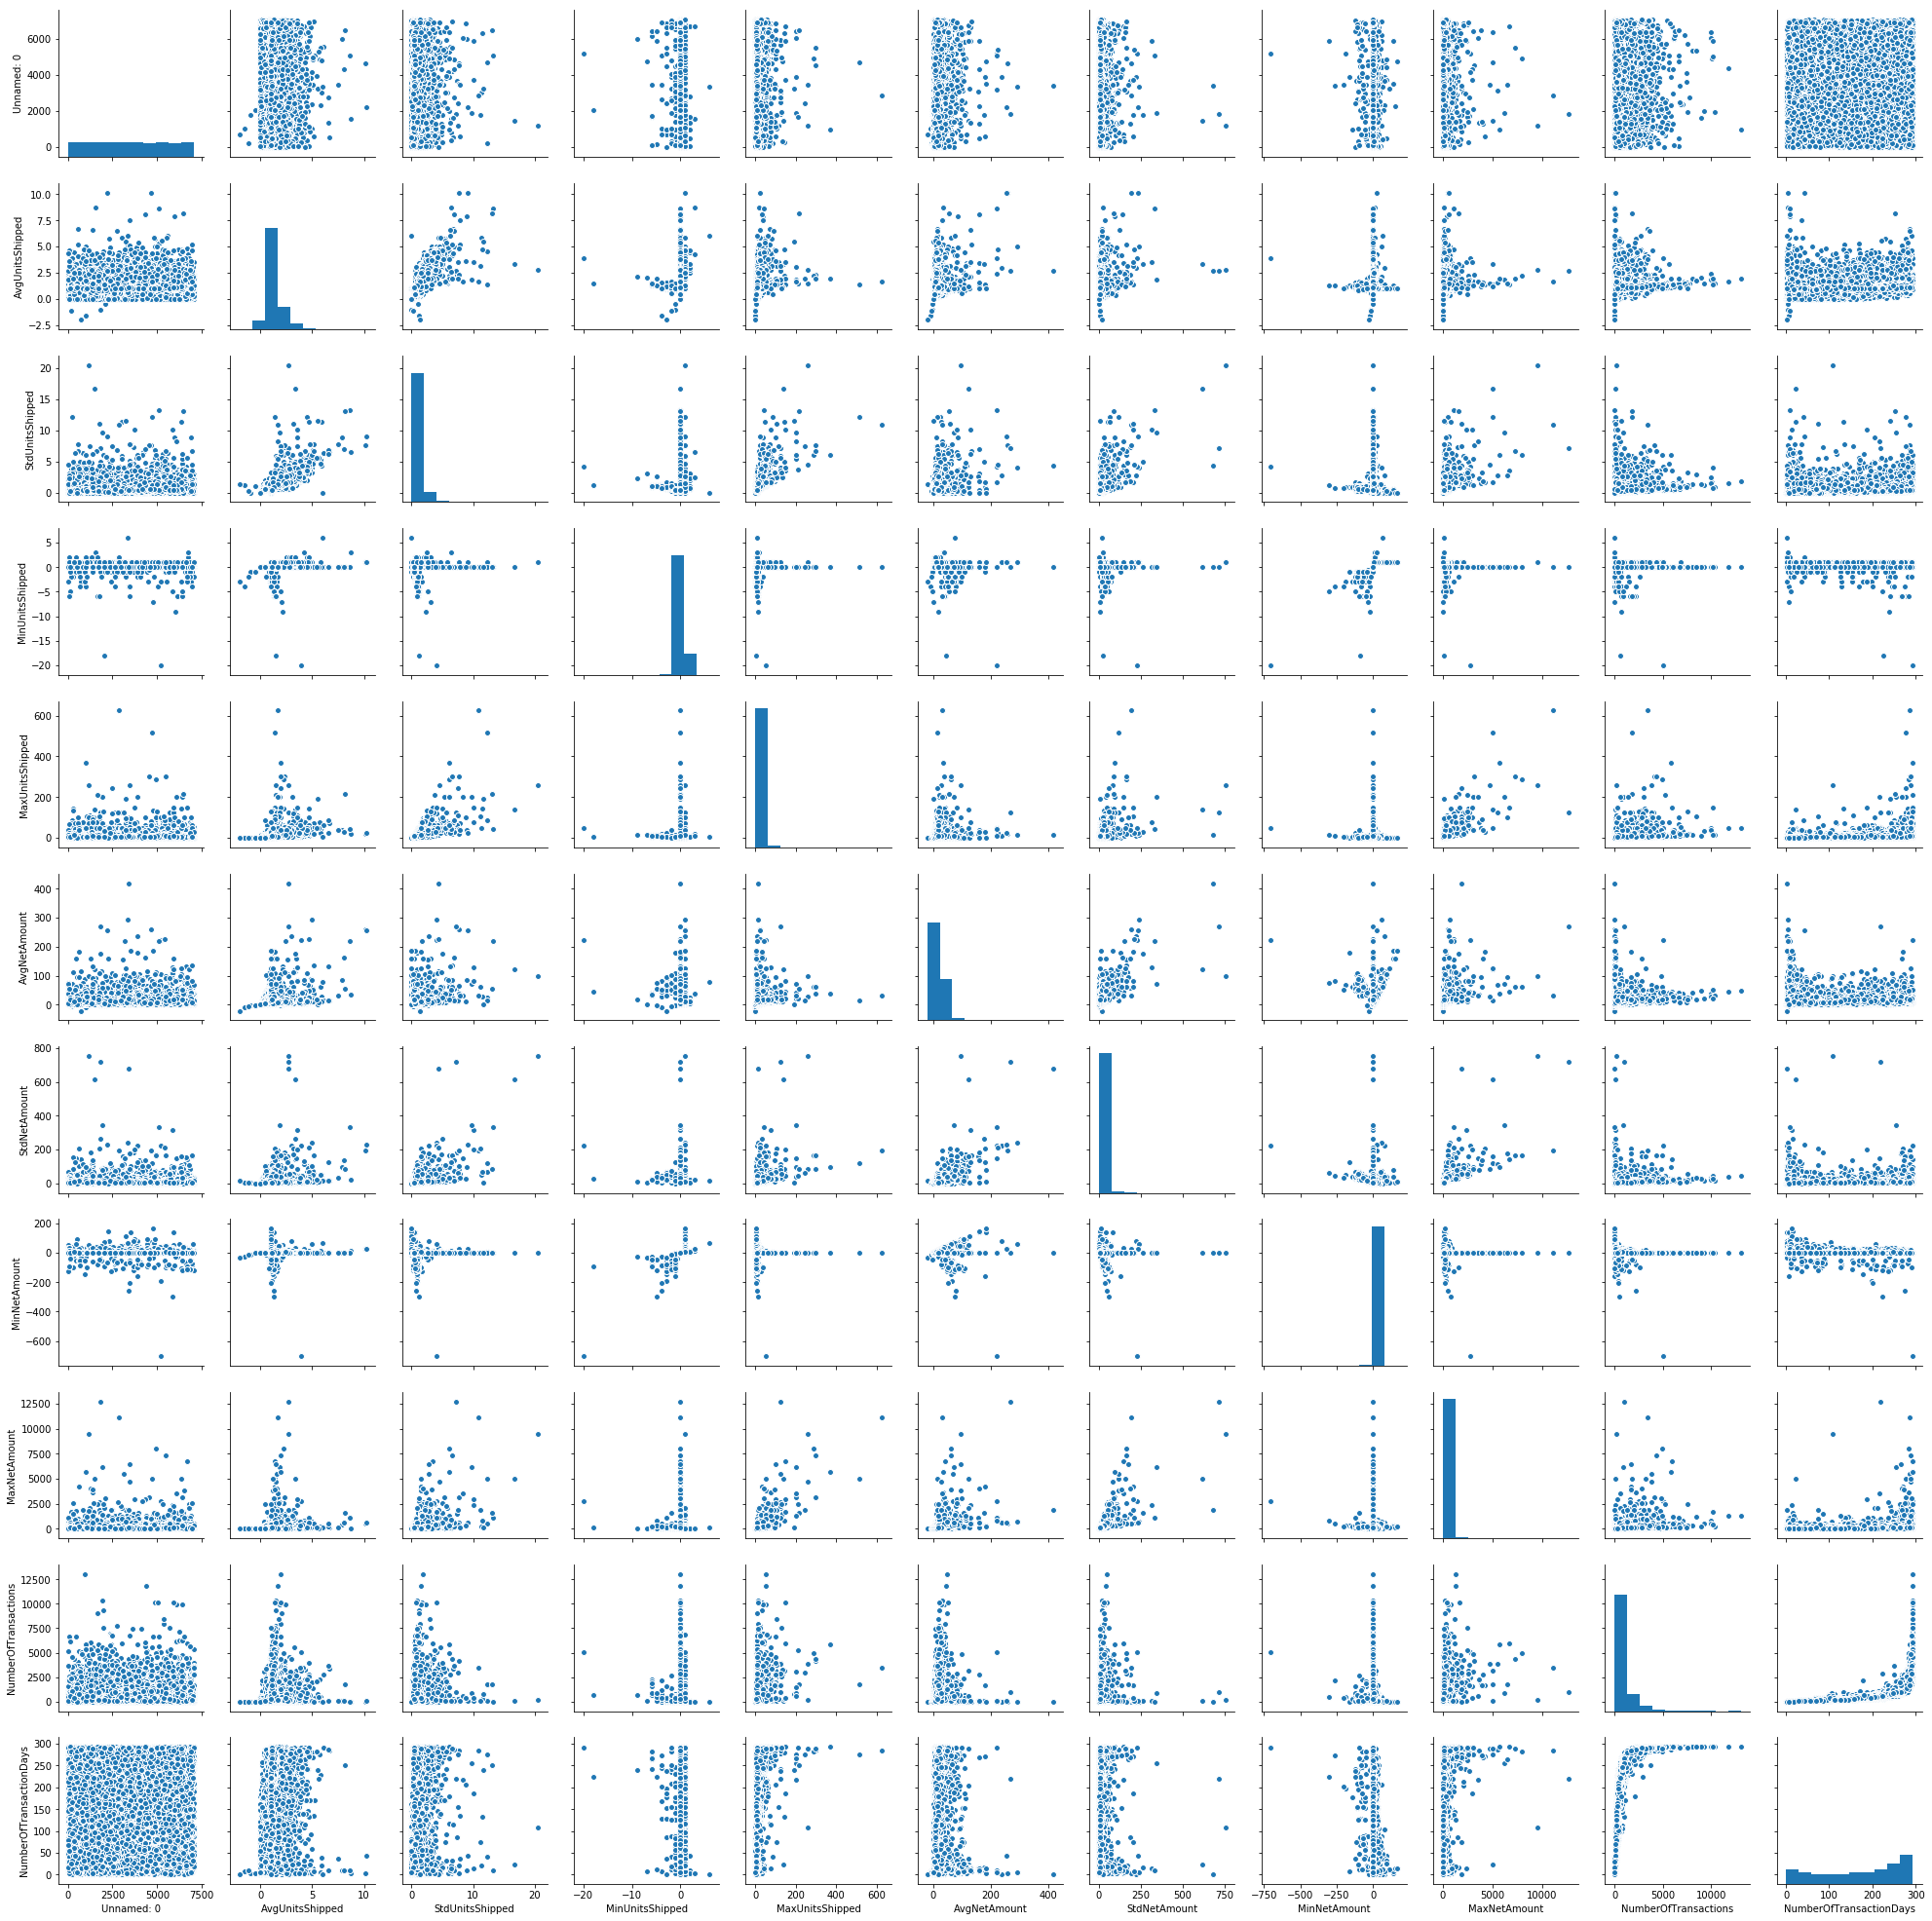

In [54]:
sns.pairplot(training_df.dropna());

Look at correlations between numeric values

In [55]:
plt.figure(figsize=(7,5))
sns.heatmap(training_df.drop('GLCategory', axis=1).corr());

ValueError: labels ['GLCategory'] not contained in axis

<Figure size 504x360 with 0 Axes>

Create a new feature 'TransactionsPerDay' that includes NumberOfTransactions and NumberOfTransactionDays

In [38]:
training_df['TransactionsPerDay'] = training_df['NumberOfTransactions'] / training_df['NumberOfTransactionDays']
training_df.corr()['TransactionsPerDay'].sort_values(ascending=False)

TransactionsPerDay         1.000000
NumberOfTransactions       0.987885
NumberOfTransactionDays    0.604898
MaxUnitsShipped            0.372575
MaxNetAmount               0.321570
StdUnitsShipped            0.146953
StdNetAmount               0.146341
AvgNetAmount               0.135478
AvgUnitsShipped            0.089349
Unnamed: 0                 0.004763
MinNetAmount              -0.069397
MinUnitsShipped           -0.085078
Name: TransactionsPerDay, dtype: float64

### Univariate Analysis

Plot the histograms of the variables

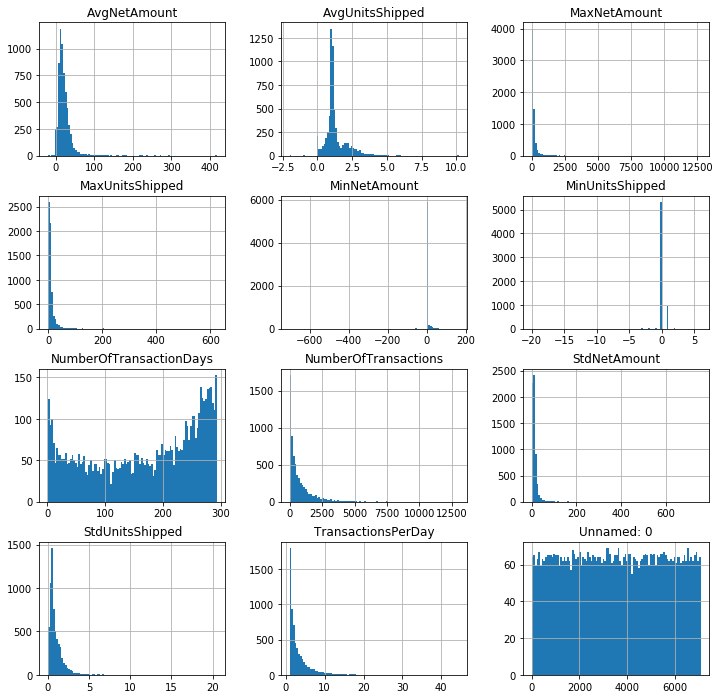

In [39]:
training_df.drop(['GLCategory'], axis=1).hist(figsize=(12,12), bins=100);

It's clear from these histograms that there are some large outliers in the data and log transforms would likely work well to help mitigate them.  From the bi-modal NumberOfTransactionDays variable, it appears that there are products that are purchased very frequently and not very frequently.

In [42]:
training_df_log = training_df.drop(['GLCategory'], axis=1).copy()
training_df_log = training_df.replace(to_replace=0, value=.001)
np.log(training_df_log).dropna().hist(figsize=(12,12));

AttributeError: 'float' object has no attribute 'log'

In [43]:
training_df_log

,Unnamed: 0,AvgUnitsShipped,StdUnitsShipped,MinUnitsShipped,MaxUnitsShipped,AvgNetAmount,StdNetAmount,MinNetAmount,MaxNetAmount,NumberOfTransactions,NumberOfTransactionDays,GLCategory,TransactionsPerDay
0,4976.0,4.407740,3.880918,0.001,36.000,13.659801,11.987085,0.001,121.320,1111,260,Body Care,4.273077
1,5659.0,0.730434,0.784906,0.001,8.000,21.783333,21.662990,0.001,203.200,345,150,Packaged Grocery,2.300000
2,3269.0,1.085324,0.560424,1.000,6.000,22.946023,6.258269,0.001,106.300,586,243,Packaged Grocery,2.411523
3,1869.0,1.088155,0.413929,0.001,6.000,41.177057,15.488765,0.001,225.720,1849,272,Refrigerated Grocery,6.797794
4,1392.0,0.773879,0.899615,0.001,9.000,47.124678,51.387510,0.001,487.200,1026,249,Packaged Grocery,4.120482
5,4225.0,2.582089,2.212180,1.000,18.000,24.997989,21.324876,0.001,173.340,1139,262,Vitamins,4.347328
6,6543.0,0.901856,0.441441,0.001,5.000,28.668090,13.903116,0.001,140.650,754,238,Packaged Grocery,3.168067
7,3268.0,0.444444,0.692675,0.001,2.000,3.800222,5.790152,0.001,17.900,45,27,Packaged Grocery,1.666667
8,6297.0,0.058823,0.242536,0.001,1.000,2.291764,9.449188,0.001,38.960,17,10,Packaged Grocery,1.700000
9,1595.0,0.815972,0.422563,0.001,2.000,25.891666,13.712443,0.001,64.020,288,151,Packaged Grocery,1.907285


Are there strong signals in GL categories?

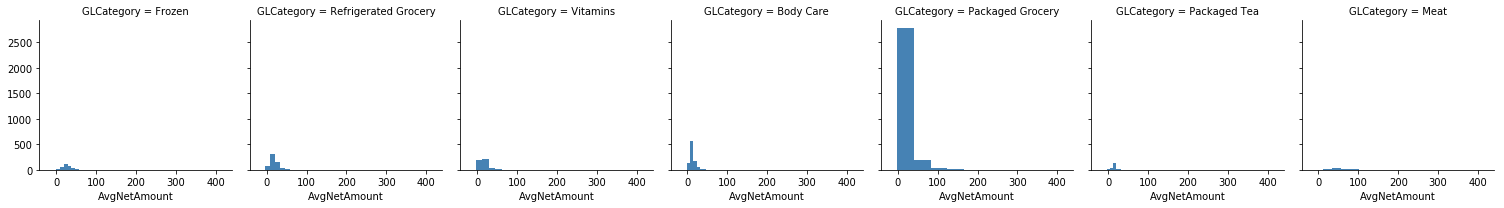

In [86]:
g = sns.FacetGrid(pd.concat([categories_log, categories.GLCategory], axis=1), col='GLCategory', margin_titles=True)
g.map(plt.hist, "AvgNetAmount", color="steelblue", lw=0);

Distributions look dissimilar, AvgNetAmount looks good

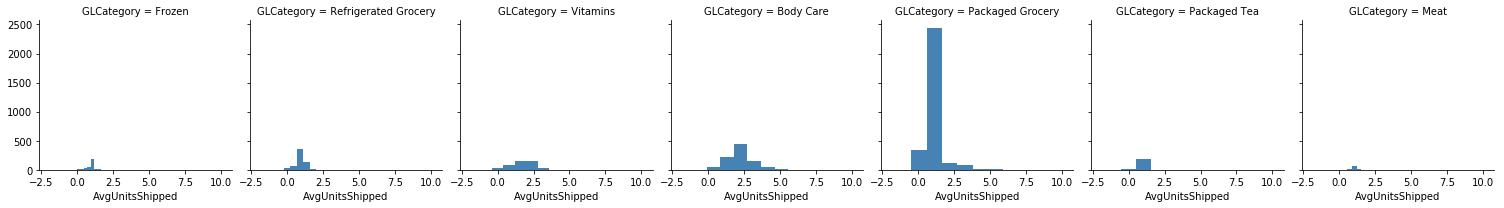

In [89]:
g = sns.FacetGrid(pd.concat([categories_log, categories.GLCategory], axis=1), col='GLCategory', margin_titles=True)
g.map(plt.hist, "AvgUnitsShipped", color="steelblue", lw=0);

Distributions look dissimilar, AvgUnitsShipped looks good

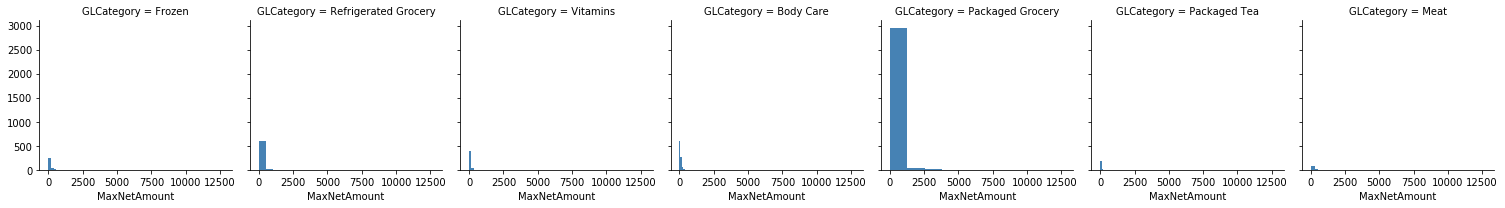

In [90]:
g = sns.FacetGrid(categories, col='GLCategory', margin_titles=True)
g.map(plt.hist, "MaxNetAmount", color="steelblue", lw=0);

Distributions look similar, MaxNetAmount might not be very informative

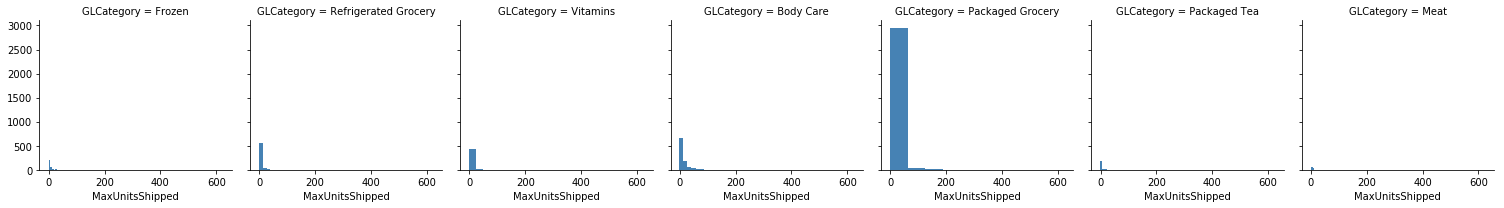

In [91]:
g = sns.FacetGrid(categories, col='GLCategory', margin_titles=True)
g.map(plt.hist, "MaxUnitsShipped", color="steelblue", lw=0);

Distributions look similar, MaxUnitsShipped might not be very informative

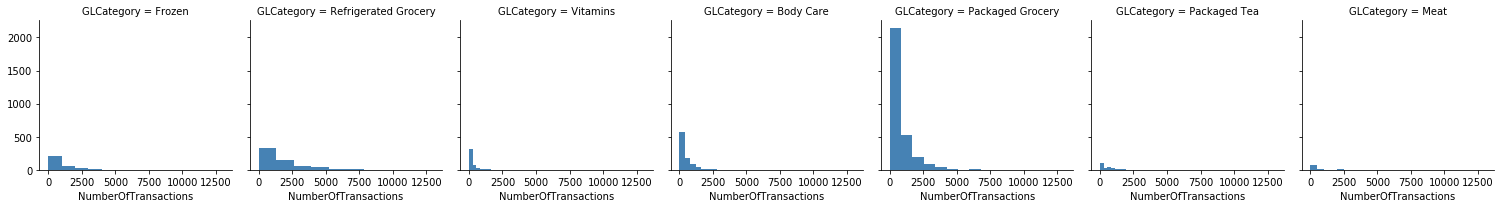

In [92]:
g = sns.FacetGrid(categories, col='GLCategory', margin_titles=True)
g.map(plt.hist, "NumberOfTransactions", color="steelblue", lw=0);

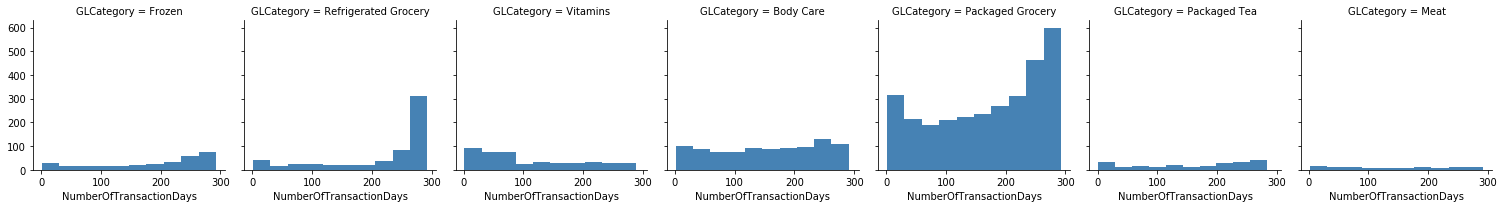

In [93]:
g = sns.FacetGrid(categories, col='GLCategory', margin_titles=True)
g.map(plt.hist, "NumberOfTransactionDays", color="steelblue", lw=0);

Number of transaction days looks very informative

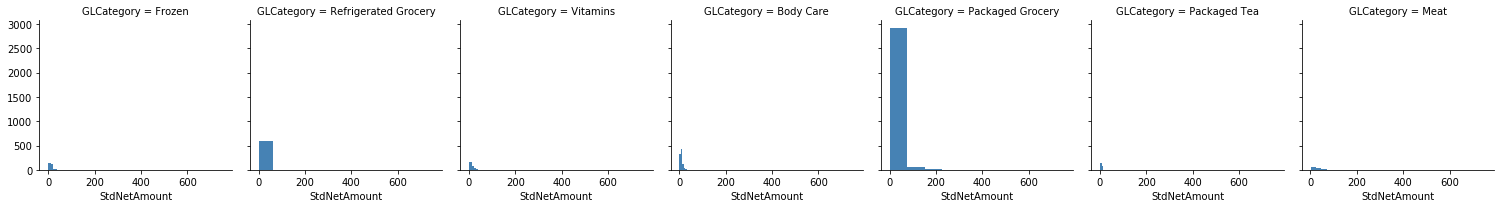

In [94]:
d = categories_log.merge(categories[['GLCategory']], how='inner', left_index=True, right_index=True)
g = sns.FacetGrid(d, col='GLCategory', margin_titles=True)
g.map(plt.hist, "StdNetAmount", color="steelblue", lw=0);

Log StdNetAmount looks like it might be informative.

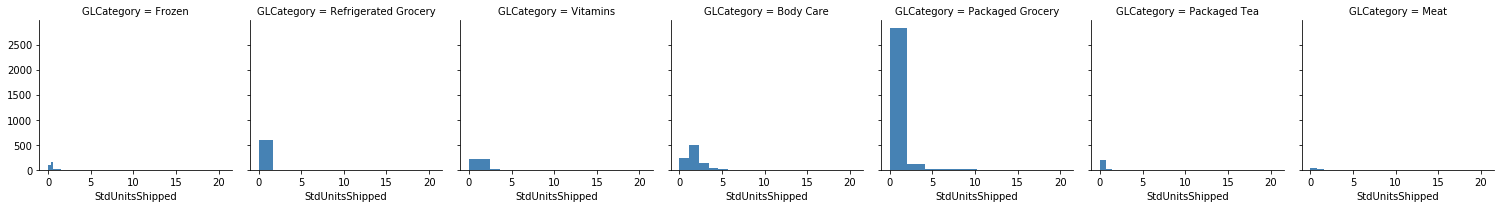

In [95]:
d = categories_log.merge(categories[['GLCategory']], how='inner', left_index=True, right_index=True)
g = sns.FacetGrid(d, col='GLCategory', margin_titles=True)
g.map(plt.hist, "StdUnitsShipped", color="steelblue", lw=0);

Log of StdUnitsShipped looks like it might be informative

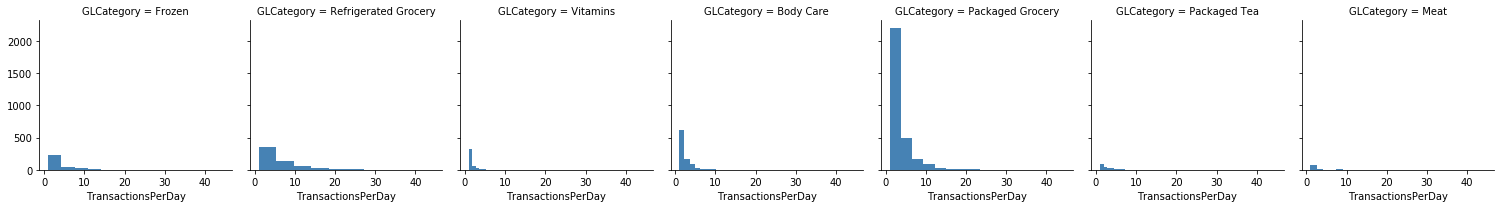

In [96]:
g = sns.FacetGrid(categories, col='GLCategory', margin_titles=True)
g.map(plt.hist, "TransactionsPerDay", color="steelblue", lw=0);

TransactionsPerDay looks informative

### Multivariate Log Transformation

Create a log transform since most variables would benefit from it.

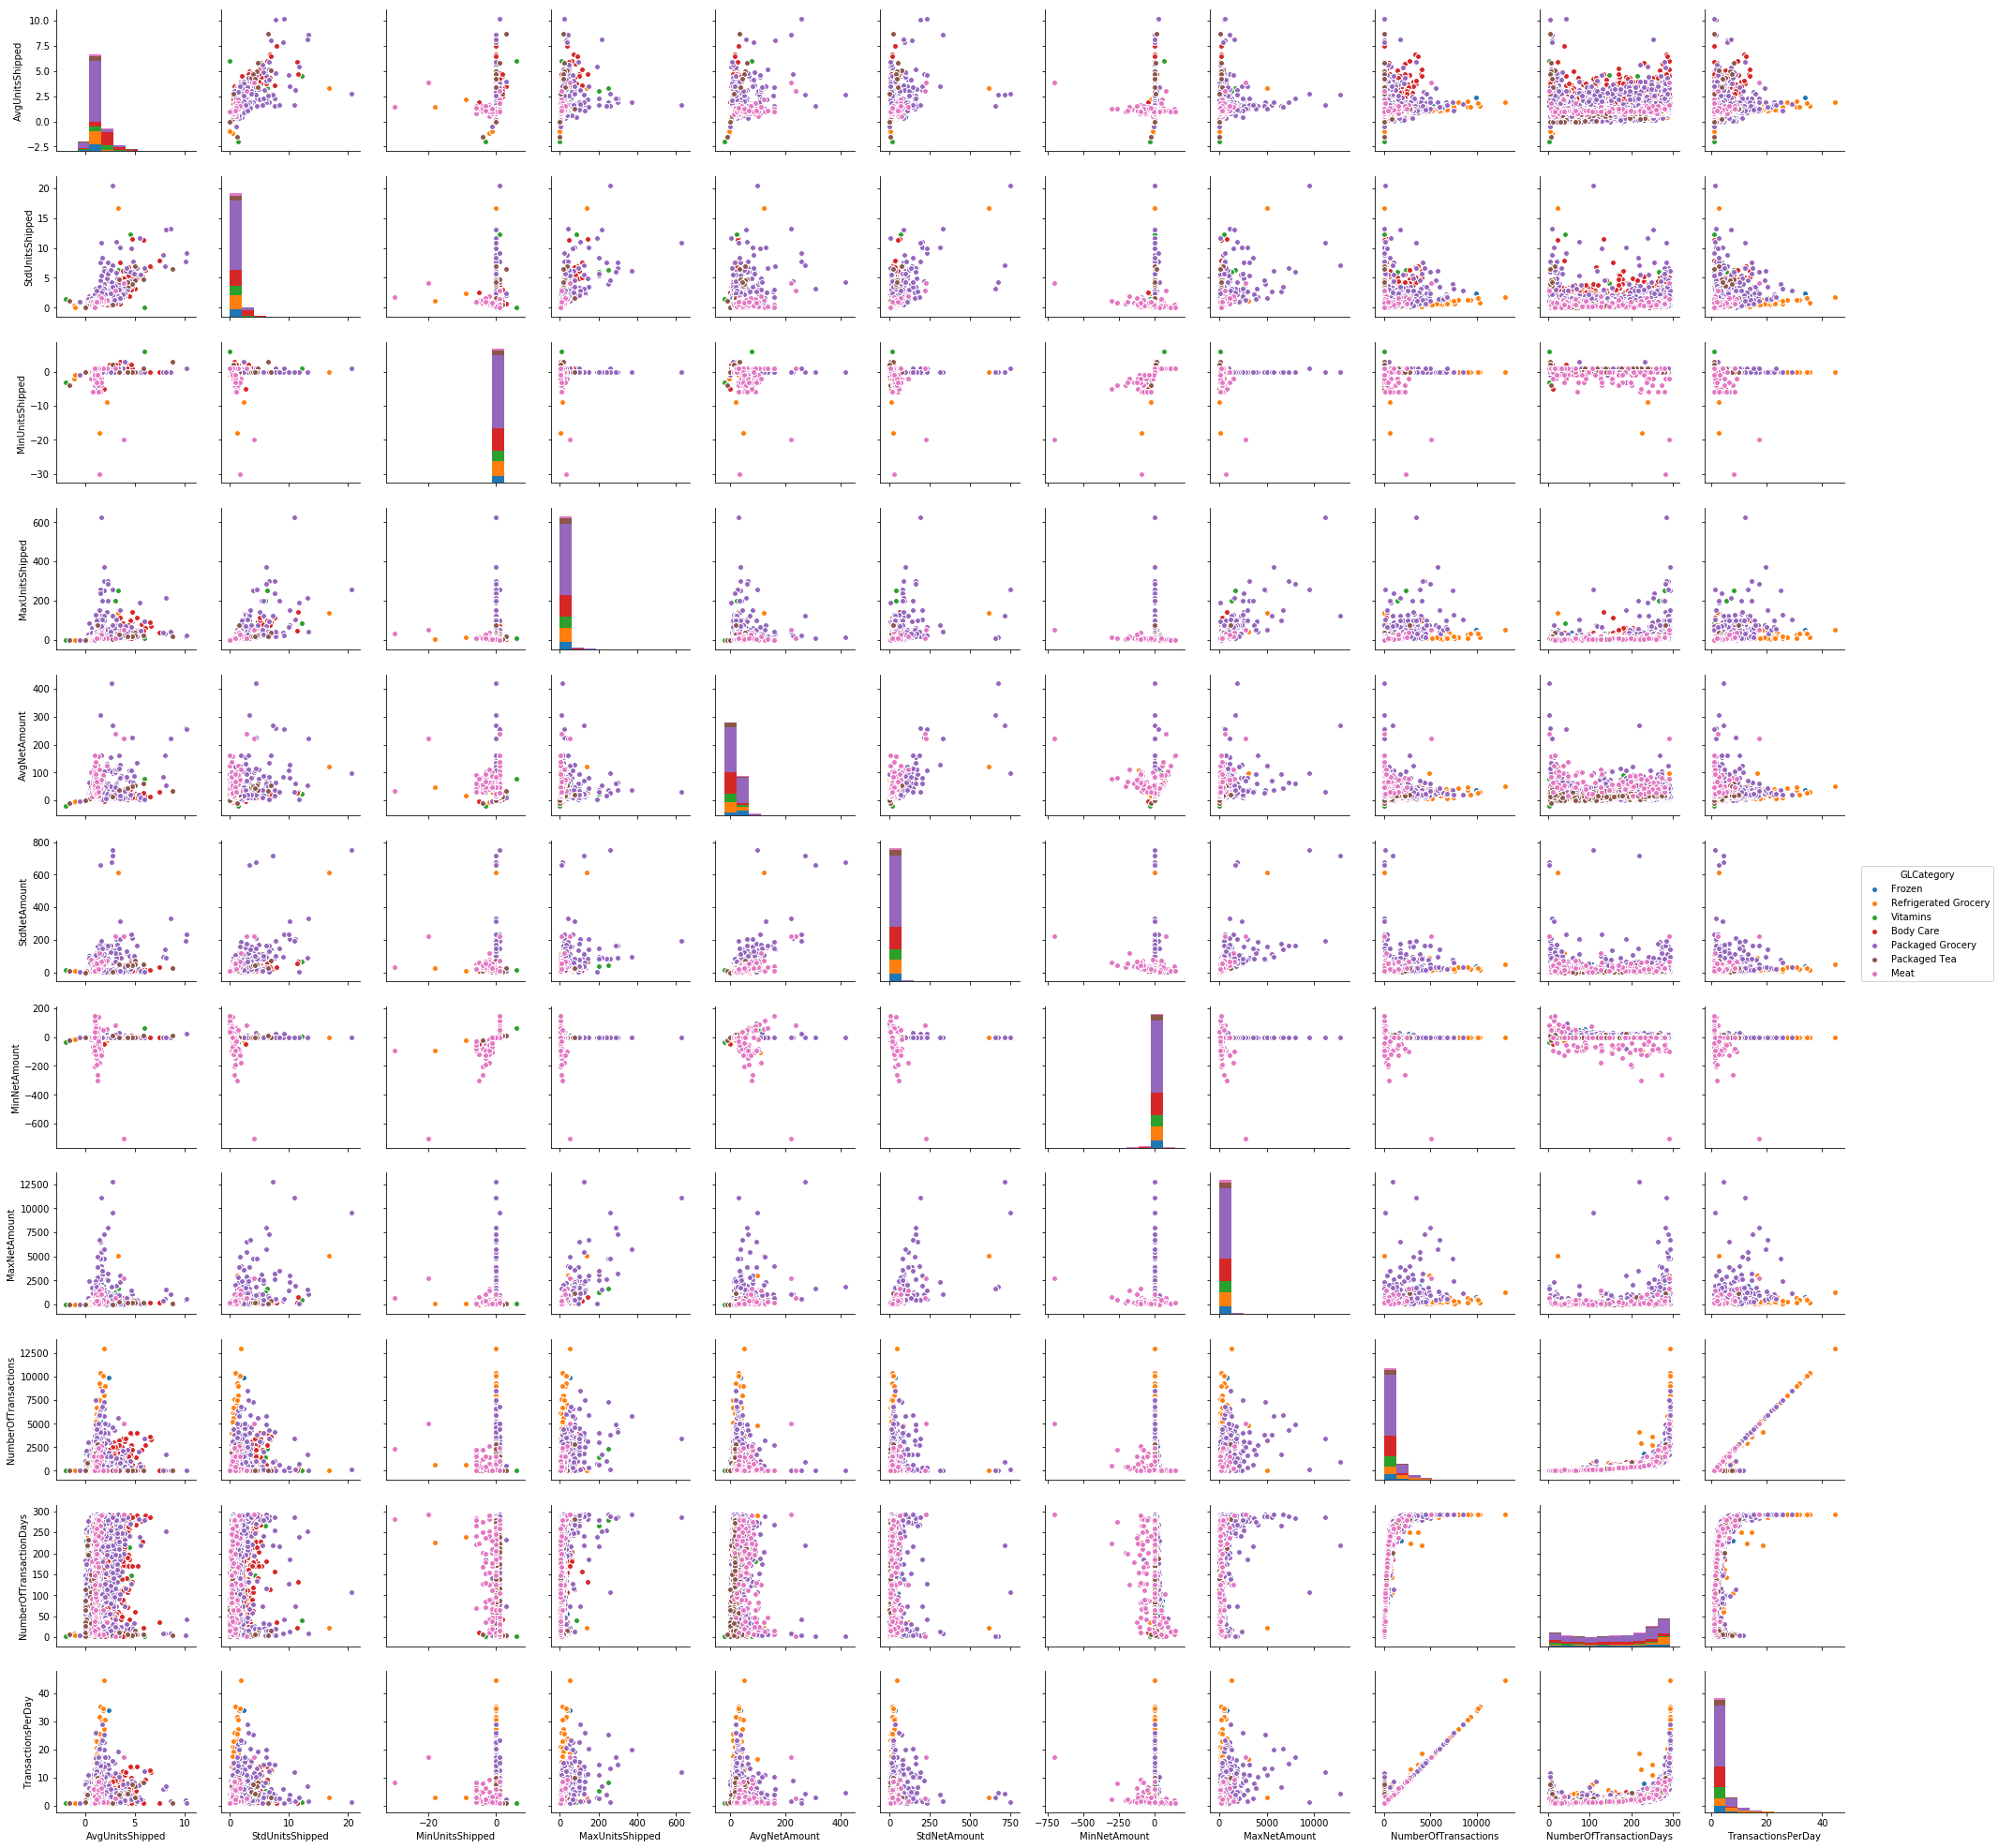

In [97]:
sns.pairplot(categories.dropna(), hue='GLCategory');

/anaconda3/envs/py35-ds/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


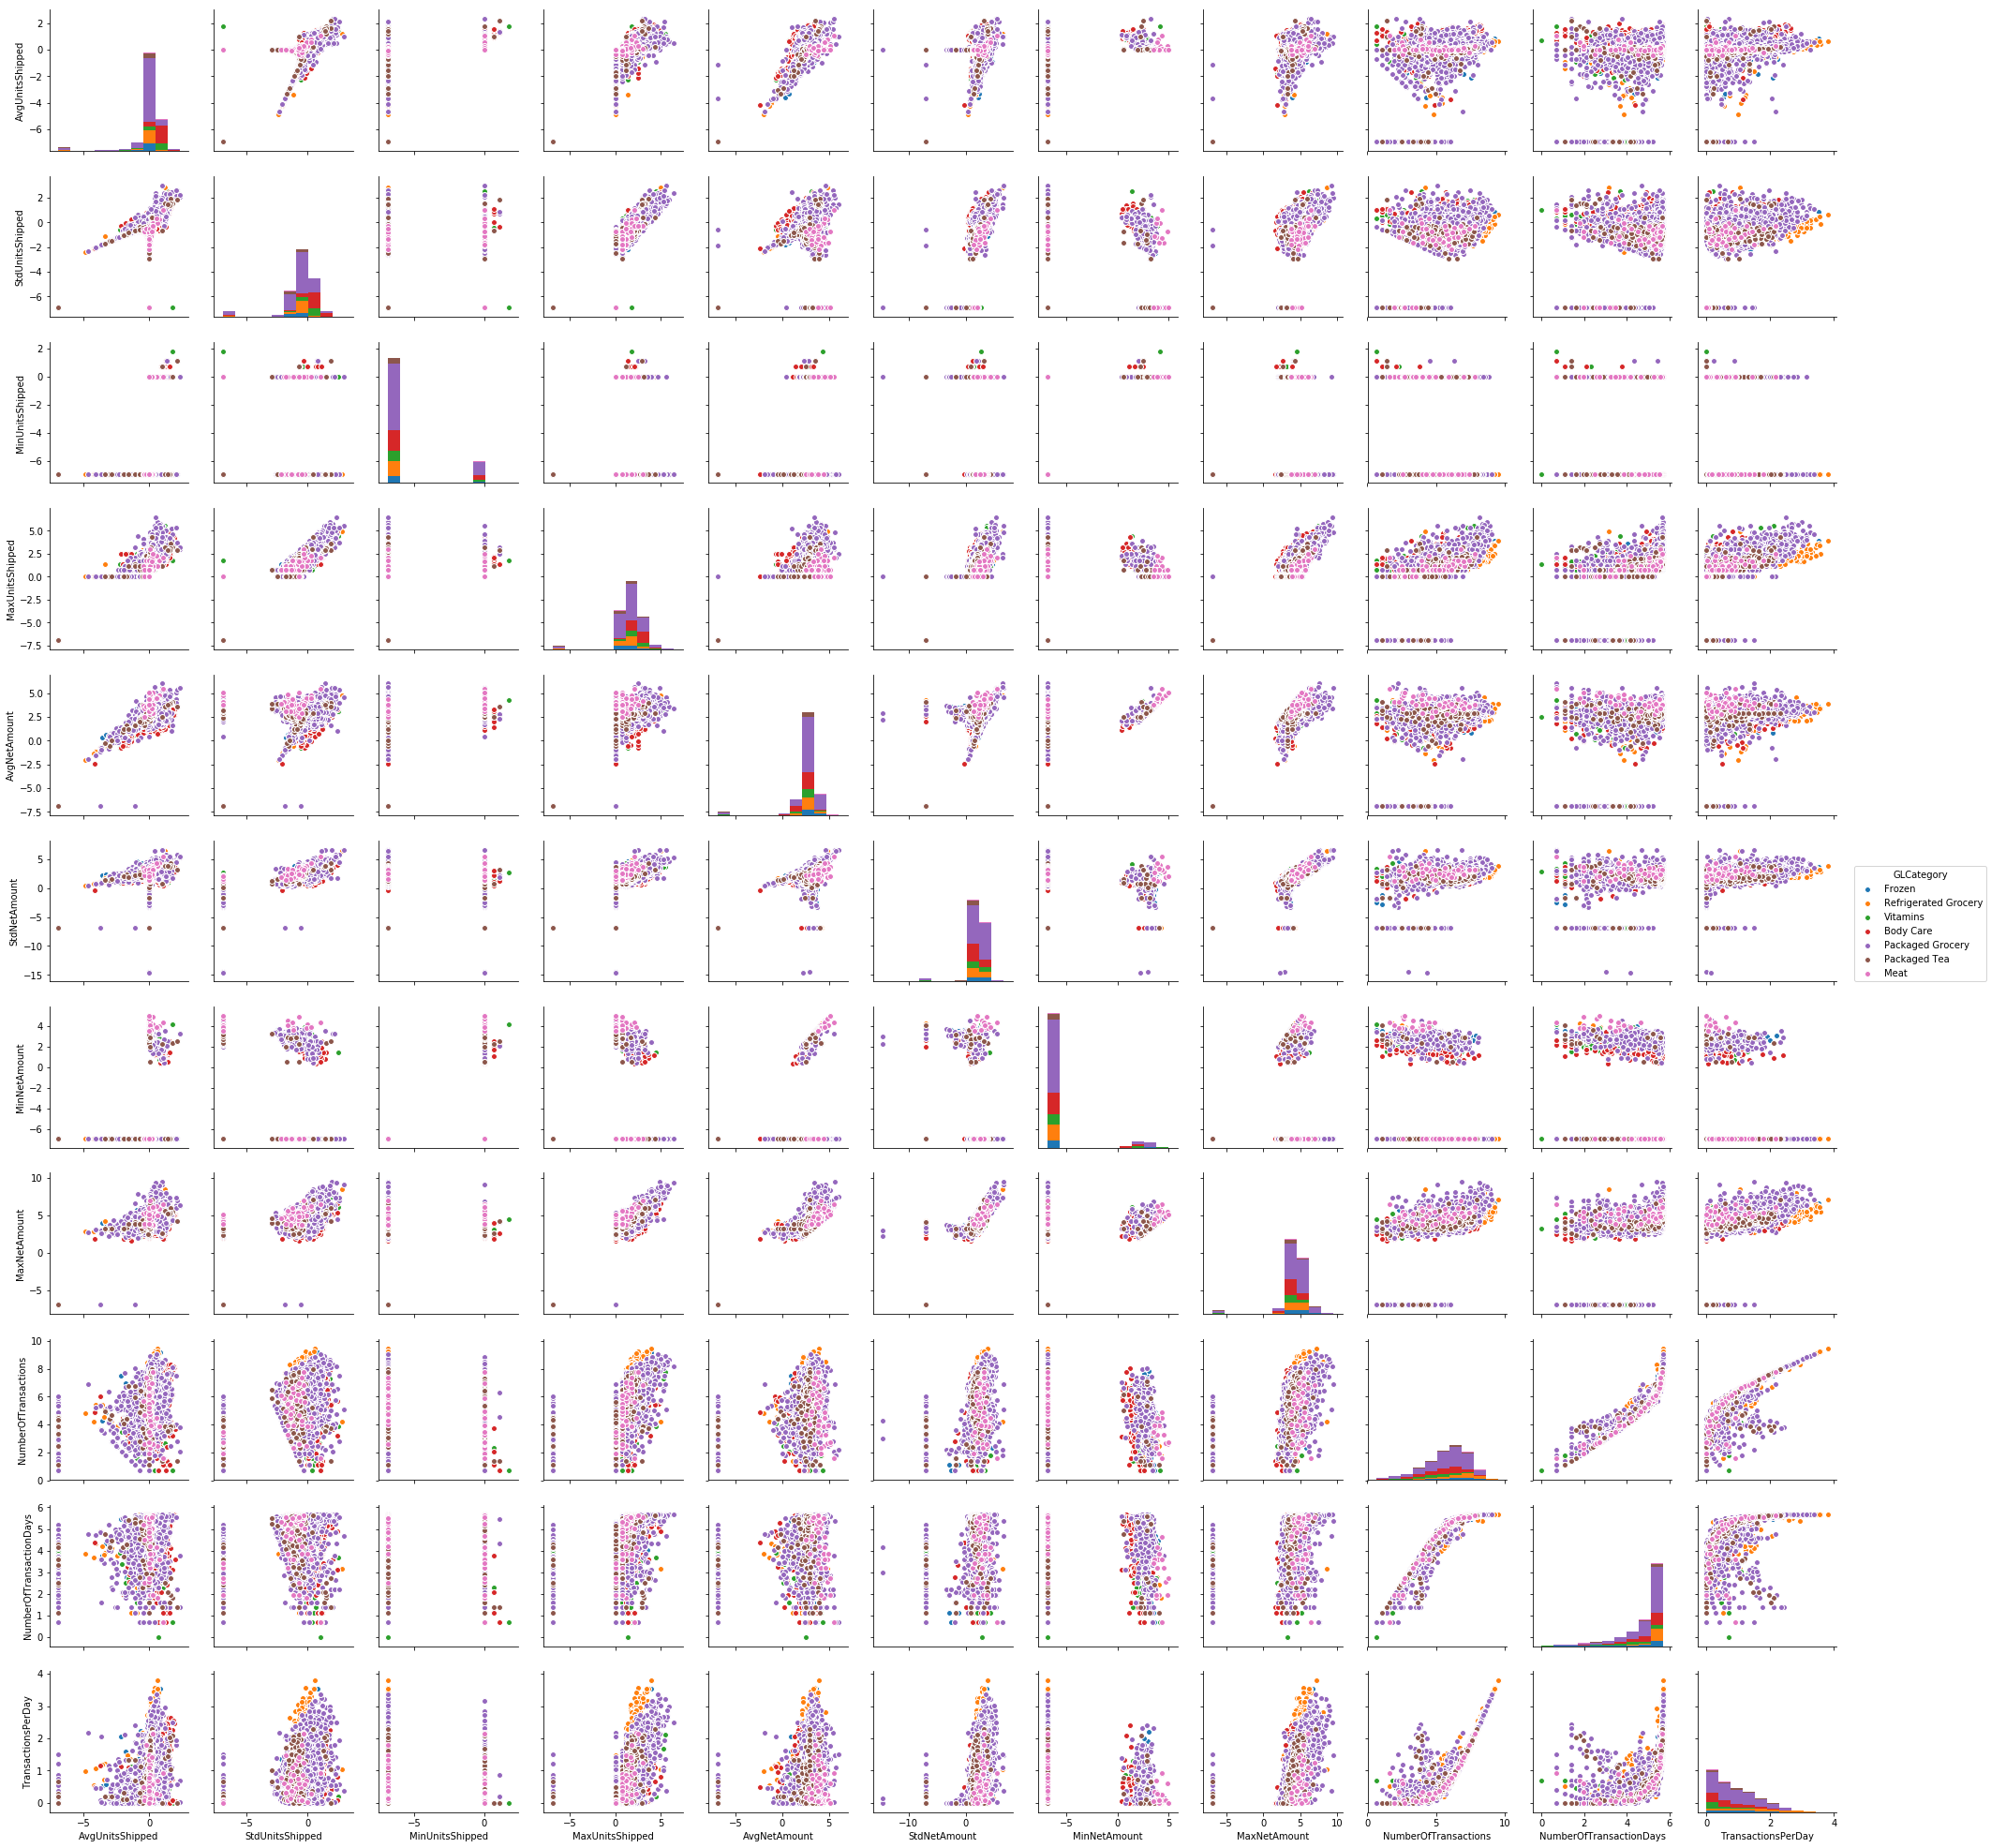

In [98]:
categories_log = categories.drop(['GLCategory'], axis=1)
categories_log = categories_log.replace(to_replace=0, value=.001)
categories_log = np.log(categories_log).dropna()

d = categories_log.merge(categories[['GLCategory']], how='inner', left_index=True, right_index=True)
sns.pairplot(d, hue='GLCategory');

The decision surface looks complex but classes look like they'll be seperable in higher dimensions.  SVMs and decision trees seem like they'd be good candidates here.